In [1]:
import sklearn
import pandas as pd
    

In [2]:
file = pd.read_excel(r'C:\Users\user\Desktop\Varsha\time balance.xlsx')

In [3]:
df = pd.DataFrame(file)


In [4]:
df.shape

(291491, 4)

In [5]:
print(df.isnull().sum())
df.dropna()


Major code stored  as  workover/drilling         0
Cde                                              0
Service hours type                               0
Minor Repair / Tripping / Complication      201202
dtype: int64


,Major code stored as workover/drilling,Cde,Service hours type,Minor Repair / Tripping / Complication
12,DTRP,6A,M/A y POOH TO SURF. B/OFF & L/DN DIR ASSY.,6A01
20,DTRP,6A,POOH.,6A02
23,DTRP,6A,M/A & R/I SAME BHA & TAGGED BOTTOM.,6A01
25,DTRP,6A,M/A & P/O 61 STDS + 02 SGLS OF 5” D/P.,6A02
28,DTRP,6A,M/A & P/O TO 1650M ( INSIDE CSG SHOE),6A01
...,...,...,...,...
291479,DTRP,6A,W/TRIP.,6A01
291483,PTRP,6A,WELL READY FOR PACKER SETTING JOB.,6A01
291486,PTRP,6A,POOH,6A02
291487,PTRP,6A,R/I WITH TCP GUN ASSY IS IN PROGRESS,6A01


In [6]:
import re
def preprocess_text(text):
   if isinstance(text,str):
      text = text.lower()  # Convert to lowercase
      text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
      text = re.sub(r'\s+', ' ', text).strip() #Remove extra-spaces
      return text




# Apply text preprocessing
df['Service hours type_lowercase'] = df['Service hours type'].apply(preprocess_text)

In [7]:
df['Service hours type_lowercase'] = df['Service hours type_lowercase'].apply(lambda x: str(x) if isinstance(x, str) else '')

In [8]:
import torch 
print(torch.cuda.is_available())

True


In [9]:
df.head()

,Major code stored as workover/drilling,Cde,Service hours type,Minor Repair / Tripping / Complication,Service hours type_lowercase
0,RDRP,1A,RIG CARRIER MOVED TO NEW SITE,NaN,rig carrier moved to new site
1,OUC,24J,DWS UNDER MAJOR REPAIR & WAITG FOR COMP OF CIV...,NaN,dws under major repair waitg for comp of civ job
2,OUC,24J,DWS UNDER MAJOR REPAIR & WAITG FOR COMP OF CIV...,NaN,dws under major repair waitg for comp of civ job
3,OUC,24J,DWS UNDER MAJOR REPAIR & WAITG FOR COMP OF CIV...,NaN,dws under major repair waitg for comp of civ job
4,OUC,24J,DWS UNDER MAJOR REPAIR & WAITG FOR COMP OF CIV...,NaN,dws under major repair waitg for comp of civ job


In [10]:
def discard_rare_samples(df, column_name, threshold=10):
    # Get the frequency of each unique value in the specified column
    value_counts = df[column_name].value_counts()

    # Filter the DataFrame to retain only the rows where the count is greater than or equal to the threshold
    fdf = df[df[column_name].isin(value_counts[value_counts >= threshold].index)]

    return fdf

In [11]:
fdf = discard_rare_samples(df,'Cde',threshold =10)

In [12]:
fdf.reset_index(drop=True, inplace=True)

In [13]:
fdf.shape

(291489, 5)

In [14]:
fdf.columns

Index(['Major code stored  as  workover/drilling', 'Cde', 'Service hours type',
       'Minor Repair / Tripping / Complication',
       'Service hours type_lowercase'],
      dtype='object')

In [15]:
fdf['Cde'].value_counts()

Cde
6A     67930
5A     38754
2A     22671
23A    13612
11A    13301
       ...  
23I       76
7B        70
11B       56
24K       45
21J       10
Name: count, Length: 73, dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()

In [19]:
fdf.loc[:, 'label_encoded'] = le.fit_transform(fdf['Cde'])

In [20]:
fdf.columns

Index(['Major code stored  as  workover/drilling', 'Cde', 'Service hours type',
       'Minor Repair / Tripping / Complication',
       'Service hours type_lowercase', 'label_encoded'],
      dtype='object')

In [21]:
from sklearn.model_selection import train_test_split


X = fdf.drop(columns=['label_encoded'])  # Features
y = fdf['label_encoded']  # Target

# Perform stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3,  # 30% test set
    stratify=y,     # Ensure class distribution is preserved
    random_state=42
)

# Combine features and target back into DataFrames
train_df = X_train.copy()
train_df['label_encoded'] = y_train

test_df = X_test.copy()
test_df['label_encoded'] = y_test


In [22]:
import pandas as pd

# Count the number of samples per class in the training set
train_counts = train_df['label_encoded'].value_counts().sort_index()

# Count the number of samples per class in the testing set
test_counts = test_df['label_encoded'].value_counts().sort_index()

# Create a DataFrame to store the counts
class_counts_df = pd.DataFrame({
    'Class': train_counts.index,
    'Train_Count': train_counts.values,
    'Test_Count': test_counts.reindex(train_counts.index, fill_value=0).values
})

# Save the DataFrame to an Excel file
class_counts_df.to_excel(r'C:\Users\user\Desktop\Varsha/class_counts.xlsx', index=False)


print("Class counts have been saved to 'class_counts.xlsx'.")


Class counts have been saved to 'class_counts.xlsx'.


In [23]:
# Verify class distribution
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))


label_encoded
65    0.233045
64    0.132953
59    0.077778
41    0.046696
1     0.045633
        ...   
49    0.000260
67    0.000240
2     0.000191
58    0.000157
29    0.000034
Name: proportion, Length: 73, dtype: float64
label_encoded
65    0.233044
64    0.132949
59    0.077773
41    0.046703
1     0.045628
        ...   
49    0.000263
67    0.000240
2     0.000194
58    0.000149
29    0.000034
Name: proportion, Length: 73, dtype: float64


In [23]:
!pip install ipywidgets --upgrade
!jupyter nbextension enable --py widgetsnbextension

usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: console contrib dejavu events execute kernel kernelspec
lab labextension labhub migrate nbconvert nbextensions_configurator notebook
qtconsole run script server troubleshoot trust

Jupyter command `jupyter-nbextension` not found.


In [24]:
!pip install jupyter-contrib-nbextensions


In [25]:
!jupyter contrib nbextension install --user


Traceback (most recent call last):
  File "D:\hehe\envs\pytorch\Lib\site-packages\jupyter_contrib_core\notebook_compat\nbextensions.py", line 6, in <module>
    from notebook.extensions import BaseExtensionApp
ModuleNotFoundError: No module named 'notebook.extensions'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\hehe\envs\pytorch\Lib\site-packages\jupyter_contrib_core\notebook_compat\nbextensions.py", line 10, in <module>
    from notebook.nbextensions import BaseNBExtensionApp
ModuleNotFoundError: No module named 'notebook.nbextensions'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "D:\hehe\envs\pytorch\Scripts\jupyter-contrib.EXE\__main__.py", line 7, in <module>
  File "D:\hehe\envs\pytorch\Lib\site-packages\jupyter_core\application.py", line 28

In [25]:
from transformers import DistilBertTokenizer

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
tokens = tokenizer('Service hours type_lowercase')
print(tokens)


{'input_ids': [101, 2326, 2847, 2828, 1035, 2896, 18382, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1]}


In [26]:
# Tokenize the training data
train_encodings = tokenizer(list(train_df['Service hours type_lowercase']), truncation=True, padding=True, max_length=128)

# Tokenize the testing data
test_encodings = tokenizer(list(test_df['Service hours type_lowercase']), truncation=True, padding=True, max_length=128)


In [52]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Create PyTorch datasets
train_dataset = CustomDataset(train_encodings, list(train_df['label_encoded']))
test_dataset = CustomDataset(test_encodings, list(test_df['label_encoded']))

# Number of labels
num_labels = len(train_df['label_encoded'].unique())

In [61]:
num_labels

73

In [63]:
num_labels_test=len(test_df['label_encoded'].unique())
num_labels_test

73

In [73]:
train_df.shape

(204042, 6)

In [74]:
test_df.shape

(87447, 6)

In [75]:
print(len(train_dataset))
print(len(test_dataset))


204042
87447


In [76]:
print(train_df.isnull().sum())
print(test_df.isnull().sum())


Major code stored  as  workover/drilling         0
Cde                                              0
Service hours type                               0
Minor Repair / Tripping / Complication      140733
Service hours type_lowercase                     0
label_encoded                                    0
dtype: int64
Major code stored  as  workover/drilling        0
Cde                                             0
Service hours type                              0
Minor Repair / Tripping / Complication      60467
Service hours type_lowercase                    0
label_encoded                                   0
dtype: int64


In [85]:
pip install --upgrade transformers accelerate


In [78]:
print(len(train_encodings['input_ids']), len(train_dataset))
print(len(test_encodings['input_ids']), len(test_dataset))


204042 204042
87447 87447


In [79]:
print(train_df['label_encoded'].value_counts())
print(test_df['label_encoded'].value_counts())


label_encoded
65    47551
64    27128
59    15870
41     9528
1      9311
      ...  
49       53
67       49
2        39
58       32
29        7
Name: count, Length: 73, dtype: int64
label_encoded
65    20379
64    11626
59     6801
41     4084
1      3990
      ...  
49       23
67       21
2        17
58       13
29        3
Name: count, Length: 73, dtype: int64


In [91]:
from sklearn.metrics import accuracy_score
import numpy as np

def compute_metrics(p):
    predictions = np.argmax(p.predictions, axis=1)
    accuracy = accuracy_score(p.label_ids, predictions)
    return {
        'accuracy': accuracy,
    }


In [94]:
from torch.utils.data import DataLoader

# Create DataLoaders for training and evaluation
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)


In [98]:
import matplotlib.pyplot as plt

# Initialize lists to store loss and accuracy
epoch_losses = []
epoch_accuracies = []

num_epochs = 30
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    total_loss = 0
    correct_predictions = 0
    total_samples = 0
    
    for batch in tqdm(train_loader, desc=f"Training Epoch {epoch + 1}"):
        optimizer.zero_grad()  # Zero the gradients
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        
        # Forward pass
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        loss_fn = FocalLoss()
        loss = loss_fn(logits, labels)
        
        # Backward pass
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        
        # Calculate accuracy
        predictions = torch.argmax(logits, dim=1)
        correct_predictions += (predictions == labels).sum().item()
        total_samples += labels.size(0)
    
    # Calculate average loss and accuracy for the epoch
    avg_loss = total_loss / len(train_loader)
    accuracy = correct_predictions / total_samples
    
    epoch_losses.append(avg_loss)
    epoch_accuracies.append(accuracy)
    
    print(f"Epoch {epoch + 1}, Loss: {avg_loss}, Accuracy: {accuracy}")



Training Epoch 1: 100%|██████████| 12753/12753 [09:03<00:00, 23.48it/s]


Epoch 1, Loss: 0.219619151536845, Accuracy: 0.88572940865116


Training Epoch 2: 100%|██████████| 12753/12753 [08:59<00:00, 23.62it/s]


Epoch 2, Loss: 0.19013522535206212, Accuracy: 0.8946736456219798


Training Epoch 3: 100%|██████████| 12753/12753 [09:00<00:00, 23.61it/s]


Epoch 3, Loss: 0.16934243906189292, Accuracy: 0.9013144352633281


Training Epoch 4: 100%|██████████| 12753/12753 [08:58<00:00, 23.66it/s]


Epoch 4, Loss: 0.15268598228971536, Accuracy: 0.9067250860117034


Training Epoch 5: 100%|██████████| 12753/12753 [09:00<00:00, 23.59it/s]


Epoch 5, Loss: 0.14099406087794428, Accuracy: 0.9117828682330108


Training Epoch 6: 100%|██████████| 12753/12753 [09:02<00:00, 23.50it/s]


Epoch 6, Loss: 0.1314702839527075, Accuracy: 0.9160319934131208


Training Epoch 7: 100%|██████████| 12753/12753 [09:03<00:00, 23.46it/s]


Epoch 7, Loss: 0.12257698102728622, Accuracy: 0.9203840385802923


Training Epoch 8: 100%|██████████| 12753/12753 [09:02<00:00, 23.49it/s]


Epoch 8, Loss: 0.11645175707325953, Accuracy: 0.9231089677615393


Training Epoch 9: 100%|██████████| 12753/12753 [09:06<00:00, 23.32it/s]


Epoch 9, Loss: 0.10978621367613708, Accuracy: 0.9265004263828035


Training Epoch 10: 100%|██████████| 12753/12753 [09:01<00:00, 23.56it/s]


Epoch 10, Loss: 0.10515452509730511, Accuracy: 0.9289901098793386


Training Epoch 11: 100%|██████████| 12753/12753 [09:01<00:00, 23.56it/s]


Epoch 11, Loss: 0.1019189365639542, Accuracy: 0.9306956410935003


Training Epoch 12: 100%|██████████| 12753/12753 [09:00<00:00, 23.58it/s]


Epoch 12, Loss: 0.09828859368239097, Accuracy: 0.9329647817606179


Training Epoch 13: 100%|██████████| 12753/12753 [08:59<00:00, 23.62it/s]


Epoch 13, Loss: 0.0953424984620548, Accuracy: 0.9350770919712608


Training Epoch 14: 100%|██████████| 12753/12753 [09:01<00:00, 23.55it/s]


Epoch 14, Loss: 0.09240844317886773, Accuracy: 0.9361160937454054


Training Epoch 15: 100%|██████████| 12753/12753 [09:01<00:00, 23.55it/s]


Epoch 15, Loss: 0.09083666869004743, Accuracy: 0.9379539506572176


Training Epoch 16: 100%|██████████| 12753/12753 [09:00<00:00, 23.59it/s]


Epoch 16, Loss: 0.08767616008996515, Accuracy: 0.9408210074396448


Training Epoch 17: 100%|██████████| 12753/12753 [09:03<00:00, 23.48it/s]


Epoch 17, Loss: 0.08538892957331232, Accuracy: 0.9411738759667128


Training Epoch 18: 100%|██████████| 12753/12753 [09:01<00:00, 23.53it/s]


Epoch 18, Loss: 0.08409324959168042, Accuracy: 0.9429186147949932


Training Epoch 19: 100%|██████████| 12753/12753 [09:01<00:00, 23.54it/s]


Epoch 19, Loss: 0.08237142400231459, Accuracy: 0.9437860832573686


Training Epoch 20: 100%|██████████| 12753/12753 [09:01<00:00, 23.54it/s]


Epoch 20, Loss: 0.0810792207788107, Accuracy: 0.9440801403632585


Training Epoch 21: 100%|██████████| 12753/12753 [09:01<00:00, 23.54it/s]


Epoch 21, Loss: 0.07898104268893054, Accuracy: 0.9455161192303545


Training Epoch 22: 100%|██████████| 12753/12753 [09:02<00:00, 23.52it/s]


Epoch 22, Loss: 0.07825710862657553, Accuracy: 0.9464914086315562


Training Epoch 23: 100%|██████████| 12753/12753 [09:01<00:00, 23.54it/s]


Epoch 23, Loss: 0.0770099488934864, Accuracy: 0.9470599190362768


Training Epoch 24: 100%|██████████| 12753/12753 [09:01<00:00, 23.55it/s]


Epoch 24, Loss: 0.07749893561078146, Accuracy: 0.9476676370551161


Training Epoch 25: 100%|██████████| 12753/12753 [09:01<00:00, 23.55it/s]


Epoch 25, Loss: 0.0741070438179488, Accuracy: 0.9485155017104322


Training Epoch 26: 100%|██████████| 12753/12753 [08:59<00:00, 23.64it/s]


Epoch 26, Loss: 0.07449711721146889, Accuracy: 0.9495250977739877


Training Epoch 27: 100%|██████████| 12753/12753 [08:58<00:00, 23.67it/s]


Epoch 27, Loss: 0.07283077120008558, Accuracy: 0.9500494996128248


Training Epoch 28: 100%|██████████| 12753/12753 [09:01<00:00, 23.57it/s]


Epoch 28, Loss: 0.07214943656067202, Accuracy: 0.9517011203575735


Training Epoch 29: 100%|██████████| 12753/12753 [09:02<00:00, 23.51it/s]


Epoch 29, Loss: 0.07234036881063975, Accuracy: 0.9509267699787298


Training Epoch 30: 100%|██████████| 12753/12753 [09:02<00:00, 23.49it/s]


Epoch 30, Loss: 0.07184825590688271, Accuracy: 0.9516570117916899


In [99]:
#save model!!!
# Define the path to save the model
model_save_path = r"C:\Users\user\Desktop\Varsha\trained_model.pth"

# Save the model state dictionary
torch.save(model.state_dict(), model_save_path)

print(f"Model saved at: {model_save_path}")


Model saved at: C:\Users\user\Desktop\Varsha\trained_model.pth


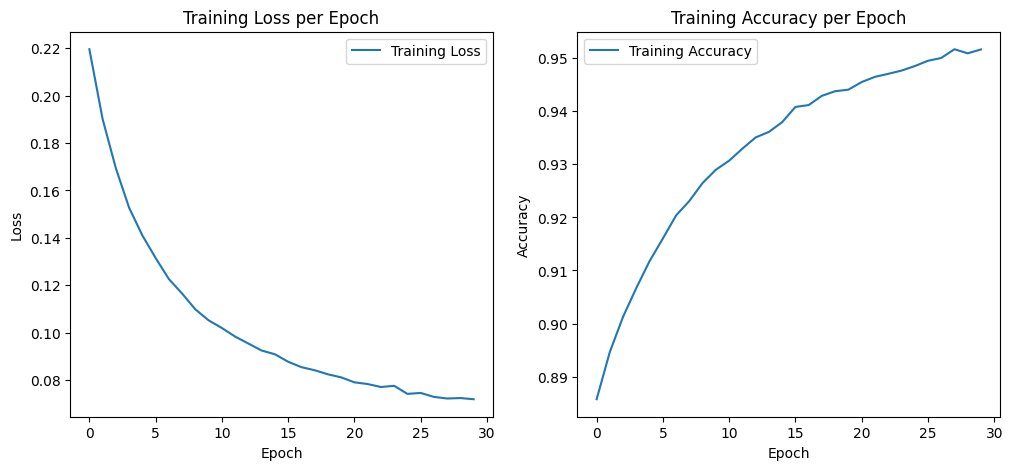

In [100]:
# Plotting the results
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(epoch_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss per Epoch')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(epoch_accuracies, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy per Epoch')
plt.legend()

plt.show()


In [103]:
# Set the model to evaluation mode
model.eval()  
total_correct = 0
total_samples = 0

# Initialize lists to store predictions and labels for metrics if needed
all_predictions = []
all_labels = []

# Disable gradient calculation
with torch.no_grad():
    for batch in tqdm(test_loader, desc="Evaluating"):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        
        # Forward pass
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        
        # Get predictions
        predictions = torch.argmax(logits, dim=1)
        
        # Store predictions and labels
        all_predictions.extend(predictions.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        
        # Count correct predictions
        total_correct += (predictions == labels).sum().item()
        total_samples += labels.size(0)

# Calculate accuracy
accuracy = total_correct / total_samples
print(f"Test Accuracy: {accuracy:.4f}")

# Optional: If you want to compute and print other metrics like F1 score
from sklearn.metrics import classification_report

print(classification_report(all_labels, all_predictions))


Evaluating: 100%|██████████| 5466/5466 [01:03<00:00, 85.50it/s]


Test Accuracy: 0.8224


D:\hehe\envs\pytorch\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\hehe\envs\pytorch\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\hehe\envs\pytorch\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.75      0.75      0.75       487
           1       0.88      0.88      0.88      3990
           2       0.27      0.18      0.21        17
           3       0.85      0.82      0.84      1934
           4       0.77      0.72      0.74      1446
           5       0.80      0.84      0.82      1049
           6       0.89      0.95      0.92      1637
           7       0.87      0.82      0.84      3656
           8       0.85      0.74      0.79      1583
           9       0.85      0.88      0.86      2660
          10       0.61      0.48      0.54      1463
          11       0.33      0.33      0.33       354
          12       0.56      0.43      0.49      1001
          13       0.50      0.46      0.48       256
          14       0.71      0.72      0.71       110
          15       0.58      0.55      0.57       772
          16       0.75      0.82      0.78      2903
          17       0.50    

In [104]:
model.config

DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5",
    "6": "LABEL_6",
    "7": "LABEL_7",
    "8": "LABEL_8",
    "9": "LABEL_9",
    "10": "LABEL_10",
    "11": "LABEL_11",
    "12": "LABEL_12",
    "13": "LABEL_13",
    "14": "LABEL_14",
    "15": "LABEL_15",
    "16": "LABEL_16",
    "17": "LABEL_17",
    "18": "LABEL_18",
    "19": "LABEL_19",
    "20": "LABEL_20",
    "21": "LABEL_21",
    "22": "LABEL_22",
    "23": "LABEL_23",
    "24": "LABEL_24",
    "25": "LABEL_25",
    "26": "LABEL_26",
    "27": "LABEL_27",
    "28": "LABEL_28",
    "29": "LABEL_29",
    "30": "LABEL_30",
    "31": "LABEL_31",
    "32": "LABEL_32",
    "33": "LABEL_33",
    "34": "LABEL_34",
    "35":